<h1 align = "center"> Logistic Regression using Gradient Descent</h1>

Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading Data

In [2]:
data = pd.read_csv("ex2data1.txt", names = ['Test1', 'Test2', 'y'] )
data.head()

,Test1,Test2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


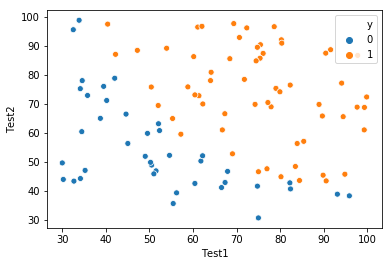

In [3]:
X = data[['Test1', 'Test2']]
y = data['y']
plt.figure()
sns.scatterplot(X['Test1'], X['Test2'], hue = data['y'])


Necessary Functions

In [4]:
def sigmoid(z):
    """Returns the sigmoid of z"""
    return 1/(1 + np.exp(-z))

In [5]:
def cost_f(h, y):
    """Returns the value of cost function"""
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [6]:
def gradDesc(X, y,alpha, iter):
    """Implements the gradient descent algorithm"""
    theta = np.zeros(X.shape[1])
    cost_iter = list()
    m = len(y)
    for i in range(iter):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / m
        theta -= alpha * gradient
        
        cost_iter.append(cost_f(sigmoid(np.dot(X, theta)), y))
    return theta, cost_iter

Preprocessing Data

In [7]:
# Adding the intercept term / bias term
Xdata = X
Xdata['intercept'] = 1
Xdata = Xdata[['intercept', 'Test1', 'Test2']]
Xdata = np.asarray(Xdata)
y = np.asarray(y)

In [8]:
# Feature scaling the data to make gradient descent effective
from sklearn import preprocessing
Xdata= preprocessing.StandardScaler().fit(Xdata).transform(Xdata)
Xdata[0:5]

array([[ 0.        , -1.60224763,  0.63834112],
       [ 0.        , -1.82625564, -1.2075414 ],
       [ 0.        , -1.53903969,  0.3612943 ],
       [ 0.        , -0.28210129,  1.0863683 ],
       [ 0.        ,  0.69152826,  0.49337794]])

In [9]:
# Splitting data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xdata, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (80, 3) (80,)
Test set: (20, 3) (20,)


In [12]:
# Cost at initial theta (all zeros)
theta = np.zeros((3,1))
print("Cost at initial theta: %0.2f"% cost_f(sigmoid(np.dot(Xdata, theta)), y))

Cost at initial theta: 0.69


Run the gradient descent algorithm.

In [13]:
theta, cost_i = gradDesc(X_train, y_train, 0.01, 5000 )

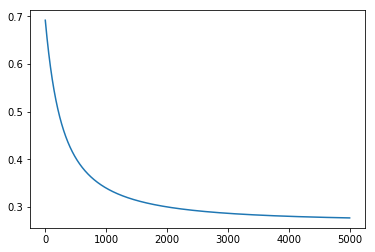

In [14]:
# Cost function as a function of number of iterations
plt.figure()
plt.plot(range(1, 5001), cost_i, '-')

Functions to make predictions

In [15]:
def probability(X, theta):
    return sigmoid(np.dot(X, theta))

In [16]:
def predict(X, threshold, theta):
    return probability(X, theta) >= threshold

Predicting on training data

In [20]:
yhat_train = predict(X_train, 0.5, theta)
yhat_train

array([ True,  True,  True,  True,  True,  True, False, False,  True,
       False, False, False,  True,  True, False, False,  True,  True,
       False, False,  True, False, False,  True, False,  True, False,
        True, False, False, False,  True, False,  True,  True, False,
        True,  True, False,  True, False, False, False, False, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False, False,  True,
        True, False, False,  True, False, False,  True, False,  True,
       False,  True,  True,  True, False, False, False,  True])

Predictiong on testing data

In [19]:
yhat_test = predict(X_test, 0.5, theta)
yhat_test

array([False,  True, False, False, False,  True, False,  True, False,
        True, False, False,  True, False,  True,  True, False, False,
       False, False])

Evaluation Metrics- Jaccard Index and Log Loss

In [21]:
# Jaccard index should be close to 1 for good prediction
from sklearn.metrics import jaccard_similarity_score
print("Jaccard index = %.2f" % jaccard_similarity_score(y_test, yhat_test))


Jaccard index = 0.80


In [22]:
# Log loss should be close to 0 for good prediction
from sklearn.metrics import log_loss
yhat_prob = probability(X_test, theta)
print("Log Loss = %.2f" % log_loss(y_test, yhat_prob))

Log Loss = 0.31


Visual Representation of predictions by the model and actual data

In [23]:
y_predicted = predict(Xdata, 0.5, theta)
data['y_predicted'] = y_predicted

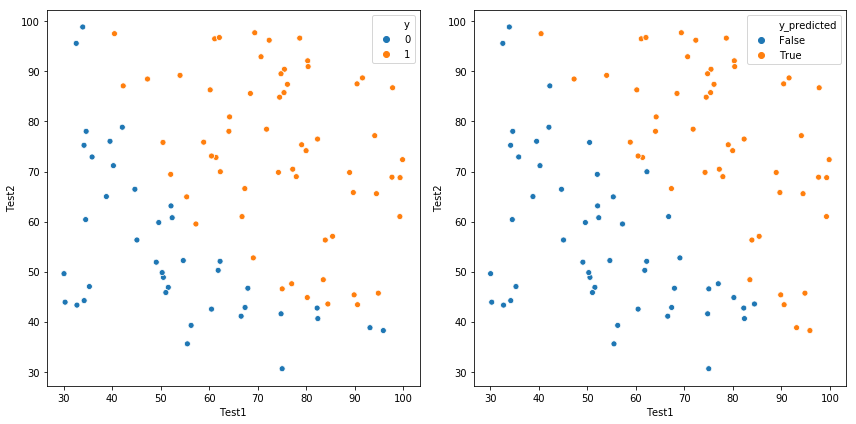

In [24]:
fig, ax =plt.subplots(1,2, figsize = (12,6))
sns.scatterplot(X['Test1'], X['Test2'], hue = data['y'], ax=ax[0])
sns.scatterplot(X['Test1'], X['Test2'], hue = data['y_predicted'], ax=ax[1])
plt.tight_layout()